<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [57]:
df = pd.read_csv('../data/states_edu.csv')
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [55]:
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Reading for 4th grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function. Answer: 33 years

In [58]:

a=np.unique(df['YEAR'])
a.size

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years? Ohio

In [59]:
data=df.groupby('STATE')
data['AVG_READING_4_SCORE'].mean()

STATE
ALABAMA                 212.615385
ALASKA                  209.888889
ARIZONA                 210.230769
ARKANSAS                214.692308
CALIFORNIA              208.230769
COLORADO                222.666667
CONNECTICUT             227.000000
DELAWARE                220.384615
DISTRICT_OF_COLUMBIA    197.000000
DODEA                   228.636364
FLORIDA                 219.384615
GEORGIA                 216.230769
HAWAII                  210.153846
IDAHO                   221.000000
ILLINOIS                218.666667
INDIANA                 222.250000
IOWA                    222.538462
KANSAS                  222.000000
KENTUCKY                220.846154
LOUISIANA               207.230769
MAINE                   224.384615
MARYLAND                220.846154
MASSACHUSETTS           231.230769
MICHIGAN                217.833333
MINNESOTA               222.923077
MISSISSIPPI             207.769231
MISSOURI                220.538462
MONTANA                 224.000000
NATIONAL      

Find the average for your outcome score across all states in 2019. Avg= 219.792453

In [60]:
data=df.groupby('YEAR')
data['AVG_READING_4_SCORE'].mean()

YEAR
1986           NaN
1987           NaN
1988           NaN
1989           NaN
1990           NaN
1991           NaN
1992    215.372093
1993           NaN
1994    212.707317
1995           NaN
1996           NaN
1997           NaN
1998    213.523810
1999           NaN
2000    213.000000
2001           NaN
2002    217.847826
2003    217.566038
2004           NaN
2005    218.245283
2006           NaN
2007    220.547170
2008           NaN
2009    220.377358
2010           NaN
2011    220.358491
2012           NaN
2013    221.320755
2014           NaN
2015    222.339623
2016           NaN
2017    221.339623
2019    219.792453
Name: AVG_READING_4_SCORE, dtype: float64

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [61]:
data=df.groupby('STATE')
data['AVG_READING_4_SCORE'].max()

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [62]:
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)
df.dropna(subset=['TOTAL_REVENUE'], inplace=True)
df.dropna(subset=['TOTAL_EXPENDITURE'], inplace=True)
df.dropna(subset=['ENROLL_ALL'], inplace=True)

df['REVENUE_PER_STUDENT']=df['TOTAL_REVENUE']/df['ENROLL_ALL']
df['EXPENDITURE_PER_STUDENT']=df['TOTAL_EXPENDITURE']/df['ENROLL_ALL']

Final feature list: REVENUE PER STUDENT, EXPENDITURE PER STUDENT

Feature selection justification: The revenue would be an important feature that could show the correlation as the more money is made per student the more economically active the state is therefore there might be more oportunities for student resulting in higher average reading score for 4th grade. In addition, the expenditure per student also plays the major role since the more money per student is spent the more opportunities can be provided and the more support there will be which could positively affect the average reading score for 4th grade.

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

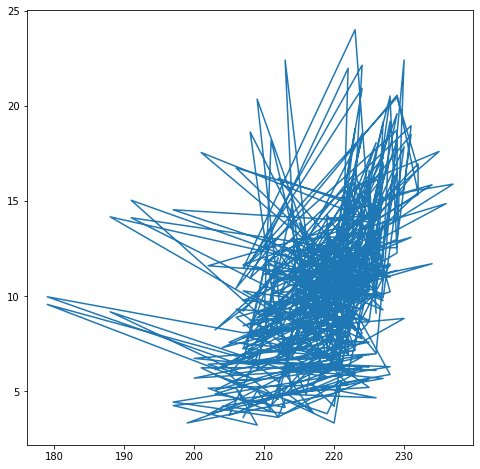

In [63]:
plt.figure(figsize=(8,8))
df.dropna()
plt.plot(df['AVG_READING_4_SCORE'],df['EXPENDITURE_PER_STUDENT'])

Total Expenditure per Student VS Average Reading Score for 4th Grade

**Visualization 2**

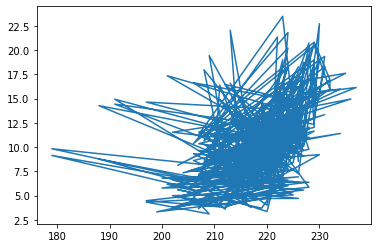

In [64]:
plt.plot(df['AVG_READING_4_SCORE'],df['REVENUE_PER_STUDENT'])

Total Revenue per Student VS Average Reading Score for 4th Grade

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [65]:
from sklearn.model_selection import train_test_split

In [107]:
X = df[['EXPENDITURE_PER_STUDENT', 'REVENUE_PER_STUDENT','TOTAL_REVENUE']]
y = df.loc[X.index]['AVG_READING_4_SCORE']
#print(X)
#print(y)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: REGRESSION

In [109]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

LinearRegression()

In [110]:
# create your model here
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [111]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.17071793883674768

In [ ]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

/Users/iaro/Downloads/mdst_tutorials_W22/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'AVG_READING_4_SCORE')

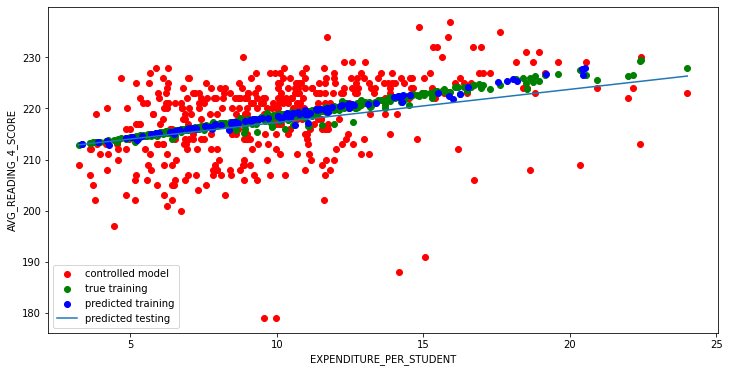

In [112]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4_SCORE')

<h2> Summary </h2>

Due to the low R^2 value, we cannot claim to have any correlation. The graph shows that there is a lot of variance between expected regression model and the actual data. This variance causes the r value to be that low. Expenditure per student is a bad feature for the prediction of average reading score for 4th grade. 